In [1]:
import tensorflow_decision_forests as tfdf
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

2023-04-16 13:58:53.681077: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 13:58:54.143360: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 13:58:54.147112: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 13:58:55.858117: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = pd.read_csv("crop-prediction.csv")
data.head

<bound method NDFrame.head of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [30]:
crops = list(data["label"].unique())
len(crops) #this is the numnber of crops in the DS

22

In [4]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size = 0.2)

In [5]:
# input_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data.drop('label', axis = 'columns'))
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label='label')


2023-04-16 13:59:13.087807: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-16 13:59:13.088368: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
model = tfdf.keras.RandomForestModel()

model.fit(x = train_ds)

Use /tmp/tmpgbwavany as temporary training directory
Reading training dataset...


2023-04-16 13:59:21.670344: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype double and shape [1760]
	 [[{{node Placeholder/_4}}]]


Training dataset read in 0:00:03.687523. Found 1760 examples.
Training model...
Model trained in 0:00:00.320134
Compiling model...


[INFO 23-04-16 13:59:25.5801 IST kernel.cc:1242] Loading model from path /tmp/tmpgbwavany/model/ with prefix 7c67e309f9cc405b
[INFO 23-04-16 13:59:25.6293 IST decision_forest.cc:660] Model loaded with 300 root(s), 25314 node(s), and 7 input feature(s).
[INFO 23-04-16 13:59:25.6293 IST abstract_model.cc:1311] Engine "RandomForestGeneric" built
[INFO 23-04-16 13:59:25.6293 IST kernel.cc:1074] Use fast generic engine
2023-04-16 13:59:25.660076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_6' with dtype double and shape [1760]
	 [[{{node Placeholder/_6}}]]


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [7]:
#Only a single epoch is required for a Decision Forest, extras lead to slower training
model.compile(metrics = ['accuracy'])


In [8]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label='label')

model.evaluate(test_ds)

2023-04-16 13:59:37.657809: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_6' with dtype double and shape [440]
	 [[{{node Placeholder/_6}}]]


1/1 [==============================] - 0s 348ms/step - loss: 0.0000e+00 - accuracy: 0.9909


[0.0, 0.9909090995788574]

In [9]:
model.make_inspector().evaluation()

Evaluation(num_examples=1760, accuracy=0.9914772727272727, loss=0.04098722240808208, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

/tmp/ipykernel_230/1539307671.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


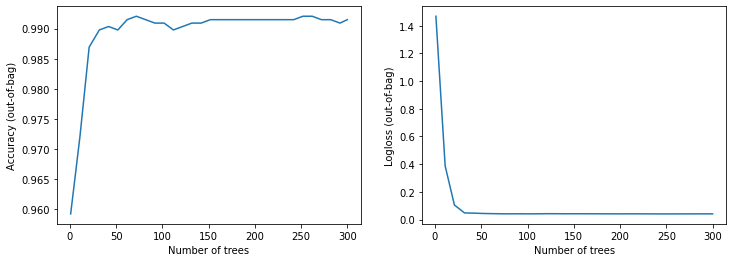

In [32]:
import matplotlib.pyplot as plt

logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))
# plt.title('Learning Curve of the RF Model')

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")


plt.show()

In [11]:
predictions = model.predict(test_ds)
type(predictions)

1/1 [==============================] - 0s 54ms/step


numpy.ndarray

In [ ]:
# test_data = tfdf.keras.pd_dataframe_to_tf_dataset(test_data)


In [12]:
from tensorflow import concat, argmax
true_anwer = concat([y for x,y in test_ds], axis=0)
true_anwer

<tf.Tensor: shape=(440,), dtype=int64, numpy=
array([ 7, 10, 17,  6, 11, 18, 15,  5, 17, 12,  4, 20,  1, 19, 13, 12,  9,
       21, 16, 20,  9, 14, 16,  7,  6, 19, 14, 13, 14,  5,  6, 15,  0, 10,
        7, 17, 13, 20, 12,  2, 14,  4, 14,  8, 17, 10, 20,  9, 10,  7, 17,
       19,  4,  9,  3,  0, 19,  7,  9,  3, 18, 12, 11,  5, 21, 11, 21,  5,
        9,  3,  2, 11, 17, 10,  4, 10, 20,  7, 19, 11, 12, 15, 12,  3,  1,
        0,  2, 20, 16, 17, 18,  8,  1,  3, 10,  7,  6,  6, 16,  0, 15, 21,
       19,  8, 11, 15, 18,  8, 19,  8, 13, 11, 20, 11,  5,  6,  1, 20, 11,
        5, 10, 18, 18, 18,  4, 16, 14,  2, 21,  7, 15,  0, 21,  3,  1,  6,
        2, 10,  9,  0,  9, 15,  8, 17,  0,  7,  3, 11,  4,  0, 20, 18,  8,
       18, 13, 20, 10,  8, 13,  4,  2,  5, 21,  5, 10,  8, 14, 14, 21, 19,
        7,  6, 15,  0, 16, 18,  1, 14, 20, 13,  2, 11,  9,  0,  4,  1, 20,
       10, 10, 21,  7,  1,  2,  2,  1, 19, 17, 17, 20, 15, 13,  8, 13, 14,
       13,  0, 19,  2,  7,  9,  3, 14,  1, 14,  9,  4,

In [13]:
predicted_answers = argmax(predictions, axis=1)
predicted_answers

<tf.Tensor: shape=(440,), dtype=int64, numpy=
array([ 7, 10, 17,  6, 11, 18, 15,  5, 17, 12,  4, 20,  1, 19, 13, 12,  9,
       21, 16, 20,  9, 14, 16,  7,  6, 19, 14, 13, 14,  5,  6, 15,  0, 10,
        7, 17, 13, 20, 12,  2, 14,  4, 14,  8, 17, 10,  8,  9, 10,  7, 17,
       19,  4,  9,  3,  0, 19,  7,  9,  3, 18, 12, 11,  5, 21, 11, 21,  5,
        9,  3,  2, 11, 17, 10,  4, 10, 20,  7, 19, 11, 12, 15, 12,  3,  1,
        0,  2, 20, 16, 17, 18,  8,  1,  3, 10,  7,  6,  6, 16,  0, 15, 21,
       19,  8, 11, 15, 18,  8, 19,  8, 13, 11, 20, 11,  5,  6,  1, 20,  6,
        5, 10, 18, 18, 18,  4, 16, 14,  2, 21,  7, 15,  0, 21,  3,  1,  6,
        2, 10,  9,  0,  9, 15,  8, 17,  0,  7,  3, 11,  4,  0, 20, 18,  8,
       18, 13, 20, 10,  8, 13,  4,  2,  5, 21,  5, 10,  8, 14, 14, 21, 19,
        7,  6, 15,  0, 16, 18,  1, 14, 20, 13,  2, 11,  9,  0,  4,  1, 20,
       10, 10, 21,  7,  1,  2,  2,  1, 19, 17, 17, 20, 15, 13,  8, 13, 14,
       13,  0, 19,  2,  7,  9,  3, 14,  1, 14,  9,  4,

<Axes: >

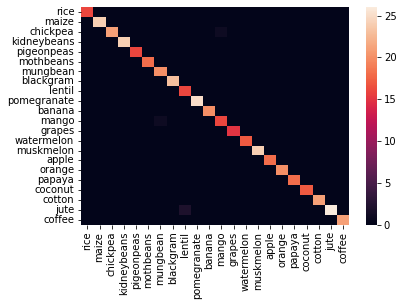

In [14]:

sns.heatmap(confusion_matrix(true_anwer, predicted_answers), xticklabels = crops, yticklabels = crops,)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(true_anwer, predicted_answers))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        24
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        18
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        23
           8       0.89      1.00      0.94        16
           9       1.00      1.00      1.00        25
          10       1.00      1.00      1.00        20
          11       0.94      0.94      0.94        17
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        18
          16       1.00      1.00      1.00        20
          17       1.00    

In [ ]:
tuner = tfdf.tuner.RandomSearch(num_trials=75)
tuner.choice("min_examples", [2, 5, 7, 10])
tuner.choice("categorical_algorithm", ["CART", "RANDOM"])

# Some hyper-parameters are only valid for specific values of other
# hyper-parameters. For example, the "max_depth" parameter is mostly useful when
# "growing_strategy=LOCAL" while "max_num_nodes" is better suited when
# "growing_strategy=BEST_FIRST_GLOBAL".

local_search_space = tuner.choice("growing_strategy", ["LOCAL"])
local_search_space.choice("max_depth", [3, 4, 5, 6, 8])

# merge=True indicates that the parameter (here "growing_strategy") is already
# defined, and that new values are added to it.
global_search_space = tuner.choice("growing_strategy", ["BEST_FIRST_GLOBAL"], merge=True)
global_search_space.choice("max_num_nodes", [16, 32, 64, 128, 256])

tuner.choice("use_hessian_gain", [True, False])
tuner.choice("shrinkage", [0.02, 0.05, 0.10, 0.15])
tuner.choice("num_candidate_attributes_ratio", [0.2, 0.5, 0.9, 1.0])


tuner.choice("split_axis", ["AXIS_ALIGNED"])
oblique_space = tuner.choice("split_axis", ["SPARSE_OBLIQUE"], merge=True)
oblique_space.choice("sparse_oblique_normalization",
                     ["NONE", "STANDARD_DEVIATION", "MIN_MAX"])
oblique_space.choice("sparse_oblique_weights", ["BINARY", "CONTINUOUS"])
oblique_space.choice("sparse_oblique_num_projections_exponent", [1.0, 1.5])

In [ ]:

# train_ds_stand = tfdf.keras.pd_dataframe_to_tf_dataset(train_data_stand, label='label')
model1 = tfdf.keras.GradientBoostedTreesModel(tuner = tuner)

model1.fit(x = train_ds)


In [ ]:

model1.compile(metrics = ['accuracy'])


In [ ]:

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label='label')

model1.evaluate(test_ds)


In [ ]:

predictions = model1.predict(test_ds)
type(predictions)




In [ ]:

true_anwer = concat([y for x,y in test_ds], axis=0)
true_anwer



In [ ]:

predicted_answers = argmax(predictions, axis=1)
predicted_answers


In [ ]:

sns.heatmap(confusion_matrix(true_anwer, predicted_answers), xticklabels = crops, yticklabels = crops,)


In [ ]:

print(classification_report(true_anwer, predicted_answers))

In [ ]:
tuning_logs = model1.make_inspector().tuning_logs()
tuning_logs.head()


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(tuning_logs["score"], label="current trial")
plt.plot(tuning_logs["score"].cummax(), label="best trial")
plt.xlabel("Tuning step")
plt.ylabel("Tuning score")
plt.legend()
plt.show()

In [ ]:
tuner = tfdf.tuner.RandomSearch(num_trials=50, use_predefined_hps=True)

# Define and train the model.
tuned_model = tfdf.keras.GradientBoostedTreesModel(tuner=tuner)
tuned_model.fit(train_ds)

In [ ]:
tuned_model.compile(["accuracy"])
tuned_test_accuracy = tuned_model.evaluate(test_ds, return_dict=True, verbose=0)["accuracy"]

In [ ]:
tuned_model.evaluate(test_ds)

In [ ]:
tuning_logs = tuned_model.make_inspector().tuning_logs()
tuning_logs.head()

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(tuning_logs["score"], label="current trial")
plt.plot(tuning_logs["score"].cummax(), label="best trial")
plt.xlabel("Tuning step")
plt.ylabel("Tuning score")
plt.legend()
plt.show()

In [ ]:
predictions = tuned_model.predict(test_ds)
true_anwer = concat([y for x,y in test_ds], axis=0)
predicted_answers = argmax(predictions, axis=1)

In [ ]:
sns.heatmap(confusion_matrix(true_anwer, predicted_answers), xticklabels = crops, yticklabels = crops,)


In [ ]:
print(classification_report(true_anwer, predicted_answers))

In [27]:
import dtreeviz
crop_features = [f.name for f in model.make_inspector().features()]
print(type(train_data), type(train_ds))

a = concat([y for x,y in train_ds], axis=0)

train_data["label"] = train_data["label"].map(crops.index)

viz_cmodel = dtreeviz.model(model,
                           tree_index=3,
                           X_train=train_data[crop_features],
                           y_train=train_data["label"],
                           feature_names=crop_features,
                           target_name="label",
                           class_names=crops)

<class 'pandas.core.frame.DataFrame'> <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


ValueError: 3 is not in list

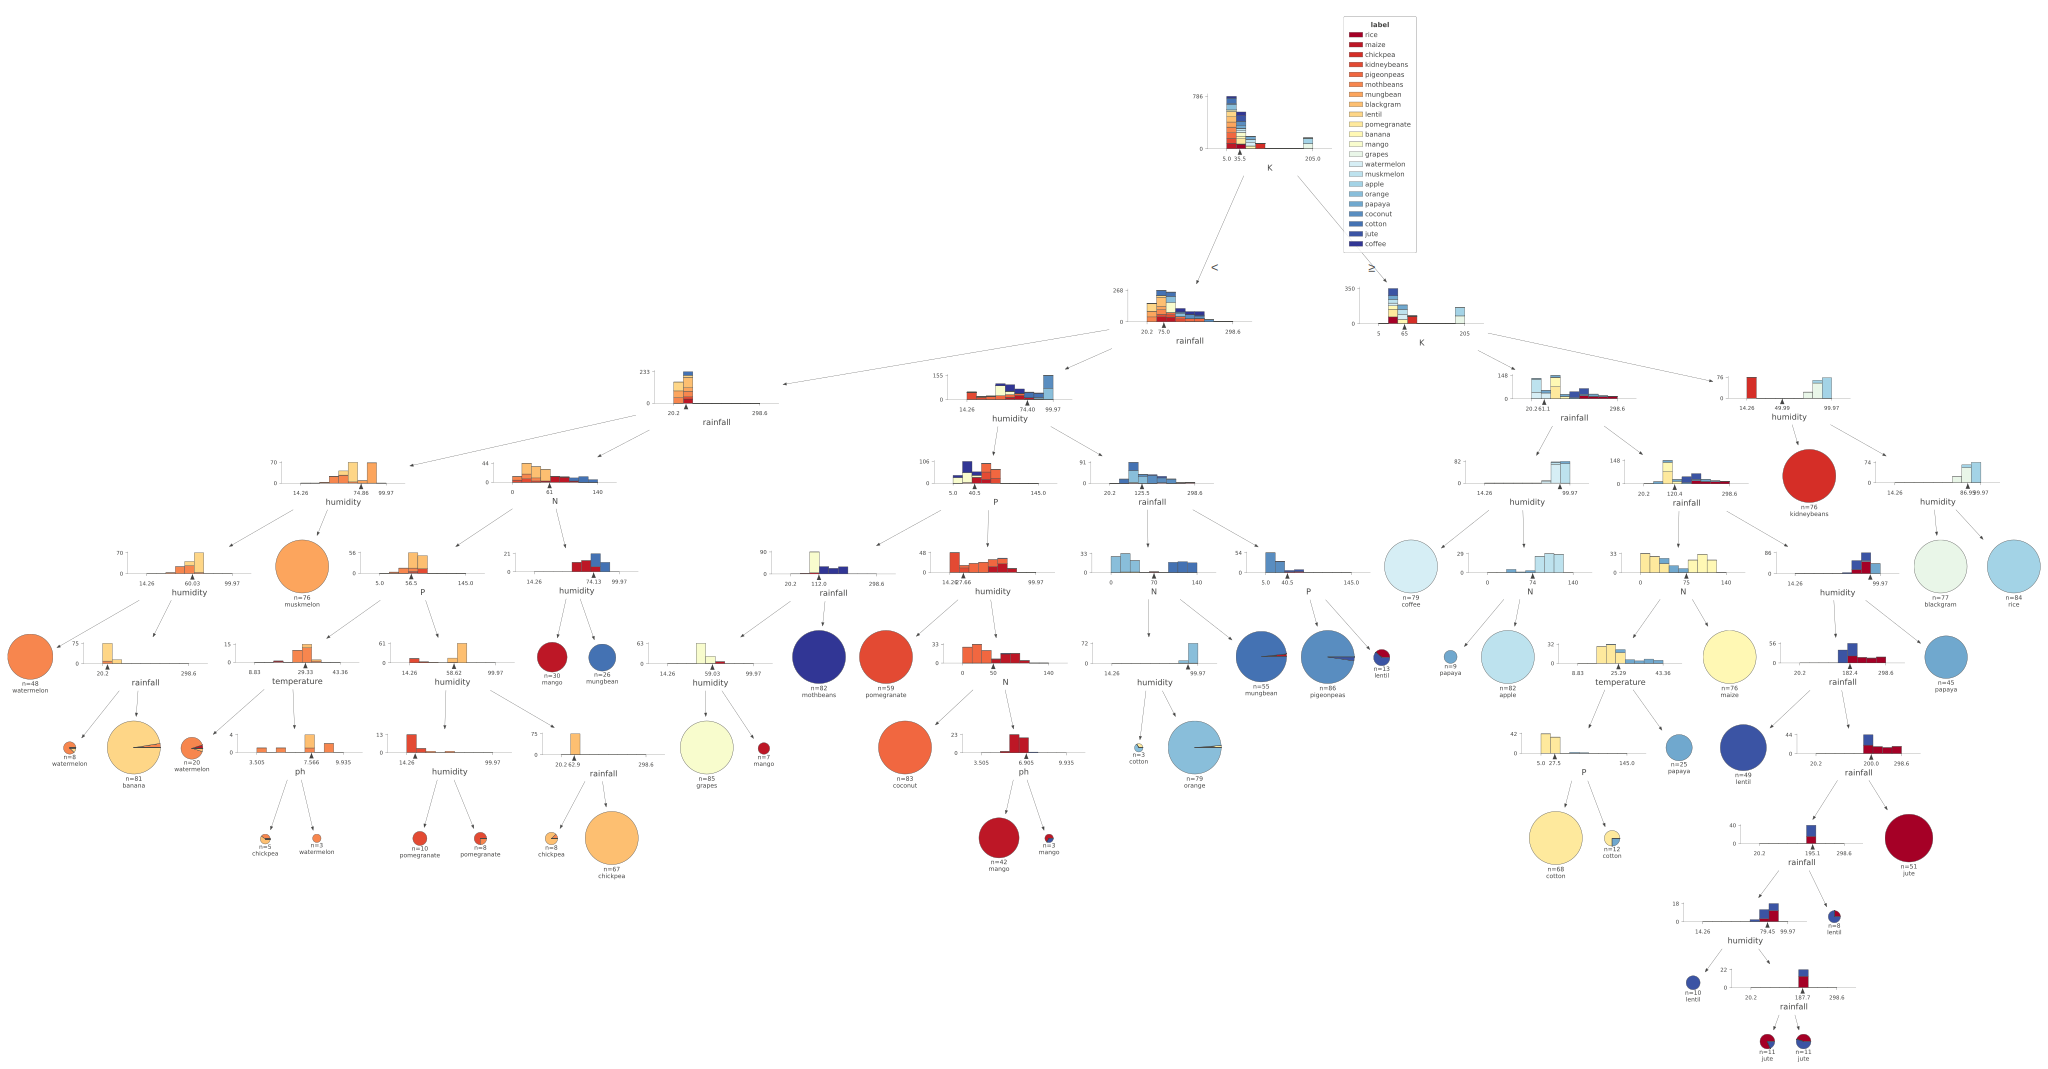

In [29]:
viz_cmodel.view(scale=1.2)
# viz_cmodel.view(depth_range_to_display=[0,0], scale=1.5)

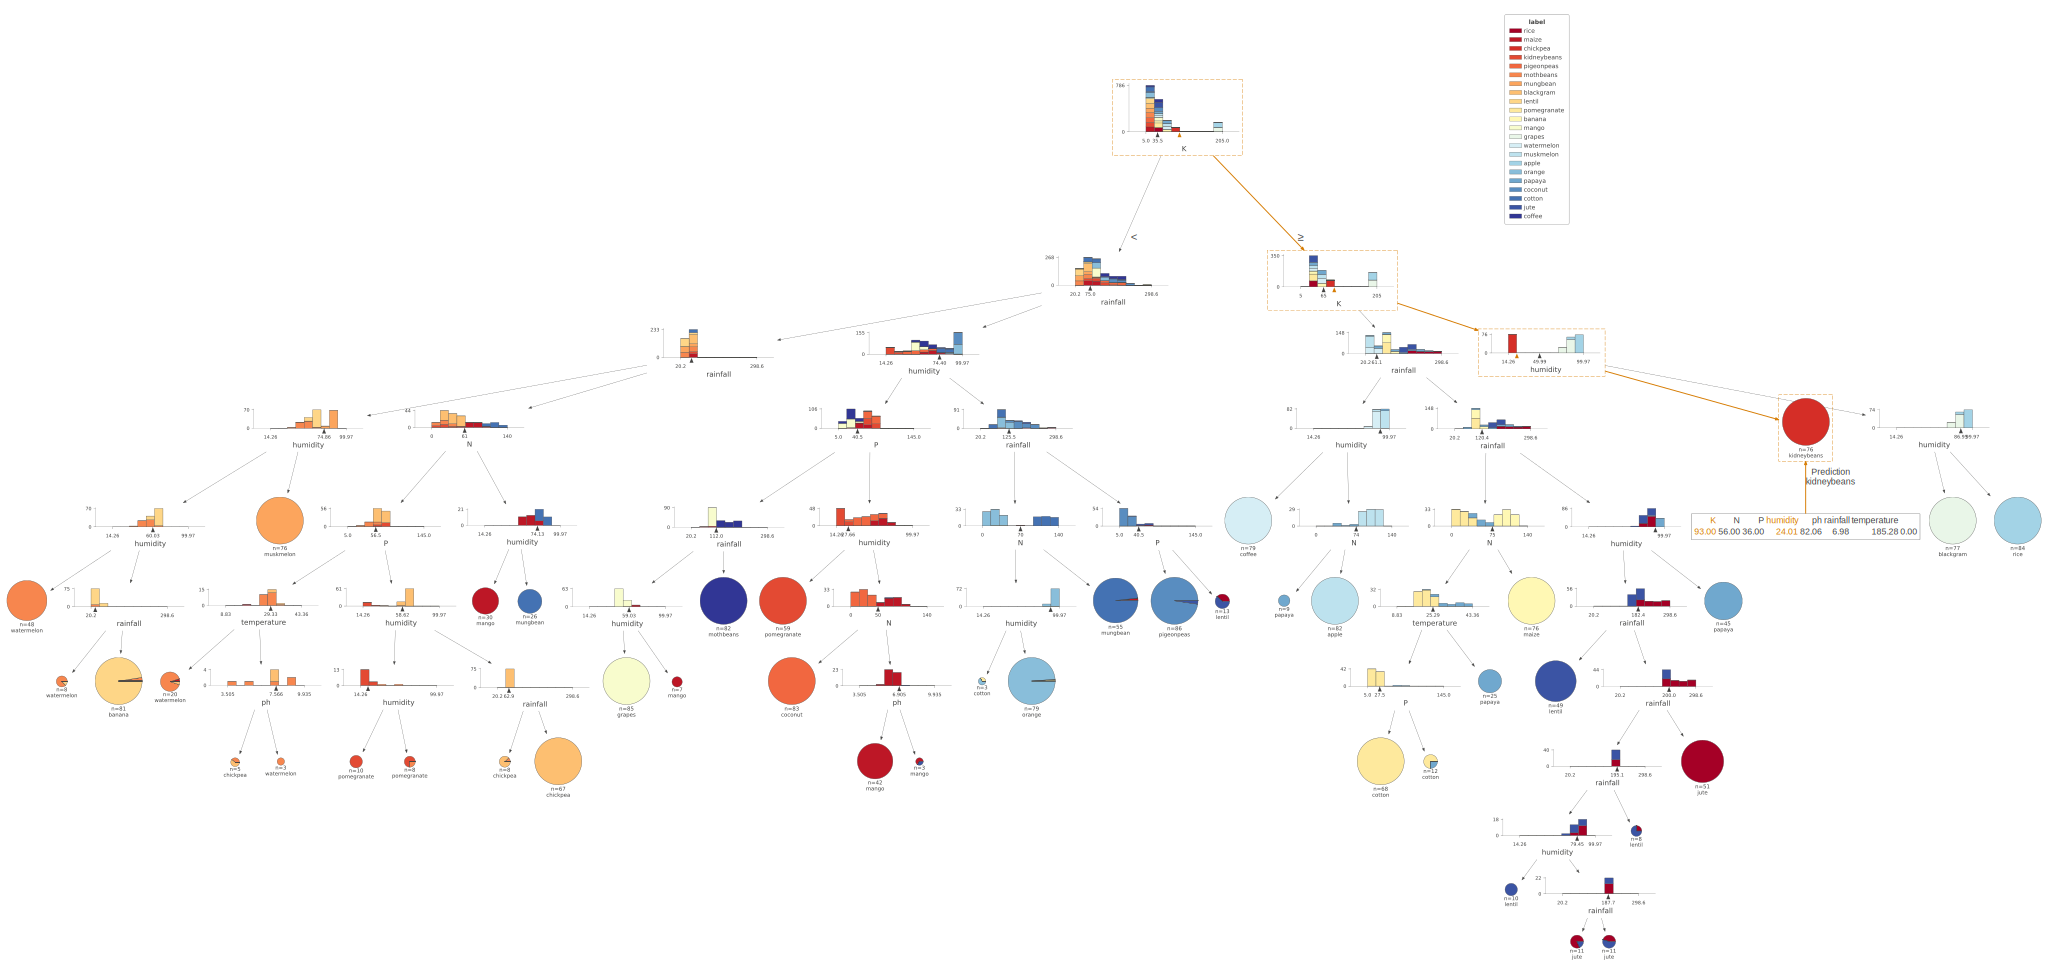

In [33]:
viz_cmodel.view(x = train_data.iloc[20])

In [ ]:
# model.save('gbt.h5', save_format = 'tf')
# model1.save('gradient_boosted_trees.h5', save_format="tf")

In [24]:
tfdf.model_plotter.plot_model(model, tree_idx=0, max_depth=3)

'\n<script src="https://d3js.org/d3.v6.min.js"></script>\n<div id="tree_plot_083a8a4447104397b1cdfb1a2fe59800"></div>\n<script>\n/*\n * Copyright 2021 Google LLC.\n * Licensed under the Apache License, Version 2.0 (the "License");\n * you may not use this file except in compliance with the License.\n * You may obtain a copy of the License at\n *\n *     https://www.apache.org/licenses/LICENSE-2.0\n *\n * Unless required by applicable law or agreed to in writing, software\n * distributed under the License is distributed on an "AS IS" BASIS,\n * WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.\n * See the License for the specific language governing permissions and\n * limitations under the License.\n */\n\n/**\n *  Plotting of decision trees generated by TF-DF.\n *\n *  A tree is a recursive structure of node objects.\n *  A node contains one or more of the following components:\n *\n *    - A value: Representing the output of the node. If the node is not a leaf,\

In [35]:
inspector = model.make_inspector()
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


### References

1. [tensorflow.org](https://www.tensorflow.org/decision_forests)
1. stackoverflow.com
1. scikit-learn.org